In [1]:
from run_kinfit import run_kinfit, build_custom_hypo
from draw_funcs import draw_1d_hist, draw_1d_hists, vertices_plot2, draw_2d_hist, draw_scatter
from ROOT import TFile
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/08


In [2]:
build_custom_hypo('Hypo2PiVertex.cpp')

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

(int) 0


Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/minor_revision/KsKpi/kfhypo_ks/Hypo2PiVertex_cpp.so


In [3]:
input_path = "/var/kinfit/data/tr_ph_run049912.root"
output_path = "kinfit_kskpi_run049912.root"

In [4]:
run_kinfit(input_path, output_path=output_path, mfield=1.0)

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

(int) 0
(TFile &) Name: /var/kinfit/data/tr_ph_run049912.root Title: 
(TrPh &) @0x7f6f18409000
 [STATUS : 01%]	CPU TIME: 24.880	REAL TIME: 24.845
 [STATUS : 02%]	CPU TIME: 20.730	REAL TIME: 20.713
 [STATUS : 03%]	CPU TIME: 24.340	REAL TIME: 24.298
 [STATUS : 04%]	CPU TIME: 18.890	REAL TIME: 18.876
 [STATUS : 05%]	CPU TIME: 21.100	REAL TIME: 21.061
 [STATUS : 06%]	CPU TIME: 22.000	REAL TIME: 21.986
 [STATUS : 07%]	CPU TIME: 22.070	REAL TIME: 22.063
 [STATUS : 08%]	CPU TIME: 22.820	REAL TIME: 22.771
 [STATUS : 09%]	CPU TIME: 20.850	REAL TIME: 20.849
 [STATUS : 10%]	CPU TIME: 24.190	REAL TIME: 24.163
 [STATUS : 11%]	CPU TIME: 22.940	REAL TIME: 22.913
 [STATUS : 12%]	CPU TIME: 22.780	REAL TIME: 22.756
 [STATUS : 13%]	CPU TIME: 21.960	REAL TIME: 21.929
 [STATUS : 14%]	CPU TIME: 21.970	REAL TIME: 21.947
 [STATUS : 15%]	CPU TIME: 21.850	REAL TIME: 21.832
 [STATUS : 16%]	CPU TIME: 20.790	REAL TIME: 20.764
 [STATUS : 17%]	CPU TIME: 23.500	REAL TIME: 23.483
 [STATUS : 18%]	CPU TIME: 23.550	REAL 

Info in <TUnixSystem::ACLiC>: creating shared library /home/hep/workdir/notebooks/minor_revision/KsKpi/kfhypo_ks/TrPh_C.so


In [5]:
fl = TFile.Open(output_path, 'read')

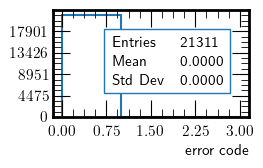

In [28]:
fl.kf_data.Draw("kf_err>>kf_err_kskpi(3,0,3)", "kf_err==0", "goff")
draw_1d_hist("kf_err_kskpi", 
             xlabel='error code',
            fraction=0.47,
             info_coords=(0.3, 0.3))
plt.savefig('kf_err_kskpi.eps')

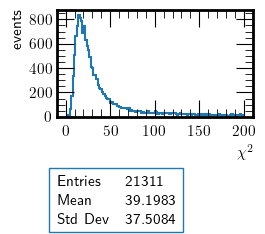

In [7]:
fl.kf_data.Draw("kf_chi2>>kf_chi2_kskpi(128,0,200)", "kf_err==0", "goff")
draw_1d_hist("kf_chi2_kskpi", 
             ylabel='events',
             xlabel=r'$\chi^2$',
            fraction=0.47,
             info_coords=(0.0, -1.0),
            h_y=200, h_x=50)
plt.savefig('kf_chi2_kskpi.eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


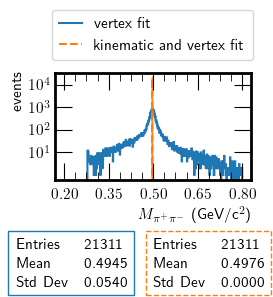

In [8]:
fl.kf_data.Draw("in_mks>>in_mks(512,0.2,0.8)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_mks>>kf_mks(512,0.2,0.8)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_vtx_mks>>kf_vtx_mks(512,0.2,0.8)", "kf_err==0", "goff")
draw_1d_hists([('kf_vtx_mks', 'vertex fit'), ('kf_mks', 'kinematic and vertex fit')], 
              xlabel=r'$M_{\pi^+\pi^-}$ (GeV/c$^2$)',
              ylabel='events',
             yscale='log',
              fraction=0.47,
             info_coords=(-0.2, -1.0),
            dh=0.0,
             dw=0.7,
             legend_loc='center right',
             bbox_to_anchor=(0.65, 1.1, 0.4, 0.5),
             h_x=0.15, y_ticks=[10., 1.e+2, 1.e+3, 1.e+4])
plt.savefig("kf_mks_kskpi.eps", bbox_inches='tight')

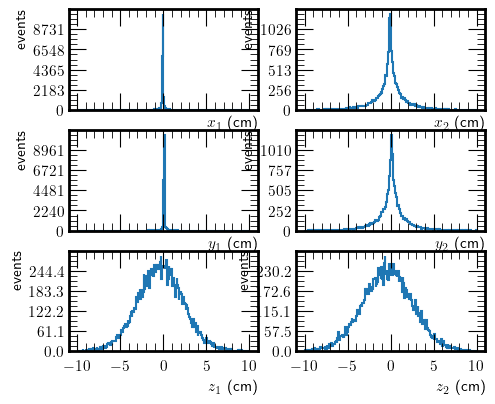

In [9]:
fl.kf_data.Draw("kf_vtx0[0]>>kf_vtx0_x(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx0[1]>>kf_vtx0_y(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx0[2]>>kf_vtx0_z(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx1[0]>>kf_vtx1_x(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx1[1]>>kf_vtx1_y(256, -10, 10)", "", "goff")
fl.kf_data.Draw("kf_vtx1[2]>>kf_vtx1_z(256, -10, 10)", "", "goff")
vertices_plot2([['kf_vtx0_x', 'kf_vtx1_x'], 
               ['kf_vtx0_y', 'kf_vtx1_y'],
               ['kf_vtx0_z', 'kf_vtx1_z']],
                info_coords=(0.6, 0.6))

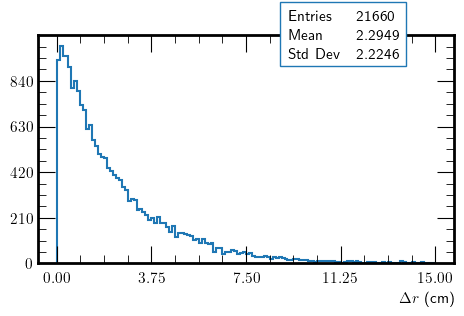

In [10]:
fl.kf_data.Draw("kf_vtx_dr>>kf_vtx_dr(128, 0, 15)", "", "goff")
draw_1d_hist("kf_vtx_dr", xlabel=r'$\Delta r$ (cm)')
plt.savefig('kf_vtx_dr_kskpi.eps')

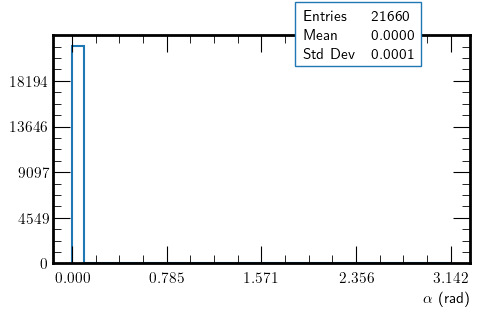

In [11]:
fl.kf_data.Draw("kf_ks_decay_prod_angle>>kf_angle(32, 0, 3.14159)", "", "goff")
draw_1d_hist("kf_angle", xlabel=r'$\alpha$ (rad)')
plt.savefig('kf_ks_prod_angle_kskpi.eps')

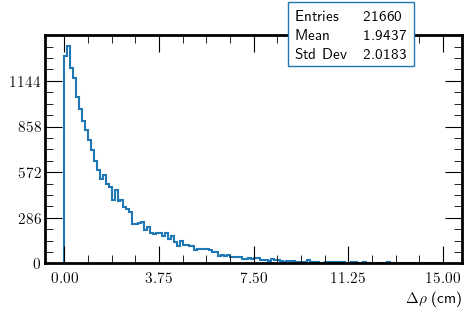

In [12]:
fl.kf_data.Draw("kf_vtx_drho>>kf_vtx_drho(128, 0, 15)", "", "goff")
draw_1d_hist("kf_vtx_drho", xlabel=r'$\Delta\rho$ (cm)')
plt.savefig('kf_vtx_drho_kskpi.eps')

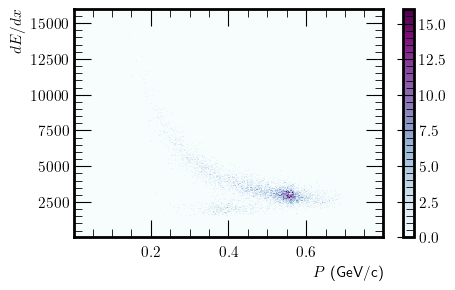

In [13]:
fl.kf_data.Draw("kf_dedx_vtx0_K:kf_p_vtx0_K>>pdedx_K(256, 0, 0.8, 256, 0, 16000)", "kf_err==0 && kf_chi2<20", "goff")
draw_2d_hist('pdedx_K', xlabel=r'$P$ (GeV/c)', ylabel=r'$dE/dx$')

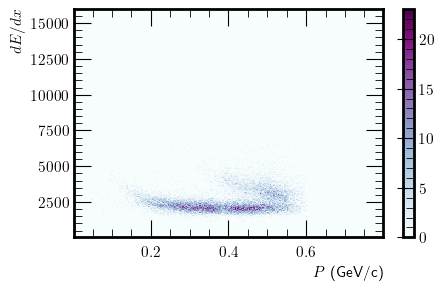

In [14]:
fl.kf_data.Draw("kf_dedx_vtx0_pi:kf_p_vtx0_pi>>pdedx_vtx0_pi(256, 0, 0.8, 256, 0, 16000)", "kf_err==0", "goff")
draw_2d_hist('pdedx_vtx0_pi', xlabel=r'$P$ (GeV/c)', ylabel=r'$dE/dx$')

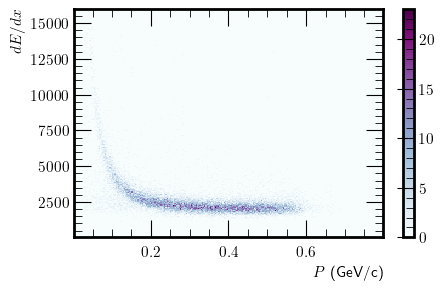

In [15]:
fl.kf_data.Draw("kf_dedx_vtx1_pi[0]:kf_p_vtx1_pi[0]>>pdedx_vtx1_pi(256, 0, 0.8, 256, 0, 16000)", "kf_err==0", "goff")
fl.kf_data.Draw("kf_dedx_vtx1_pi[1]:kf_p_vtx1_pi[1]>>+pdedx_vtx1_pi(256, 0, 0.8, 256, 0, 16000)", "kf_err==0", "goff")
draw_2d_hist('pdedx_vtx1_pi', xlabel=r'$P$ (GeV/c)', ylabel=r'$dE/dx$')

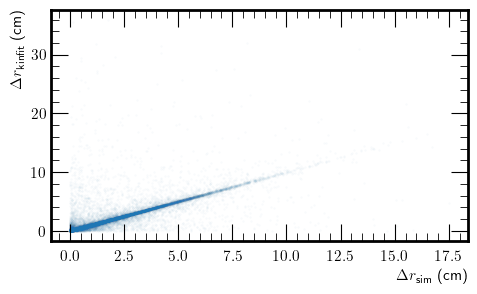

In [16]:
fl.kf_data.Draw(">>elist", "kf_err==0", "entryList")
draw_scatter('kf_data', 'elist', 'sim_vtx_dr', 'kf_vtx_dr', xlabel=r'$\Delta r_{\text{sim}}$ (cm)', ylabel=r'$\Delta r_{\text{kinfit}}$ (cm)')
plt.savefig('kf_sim_vs_kf_dr.eps')

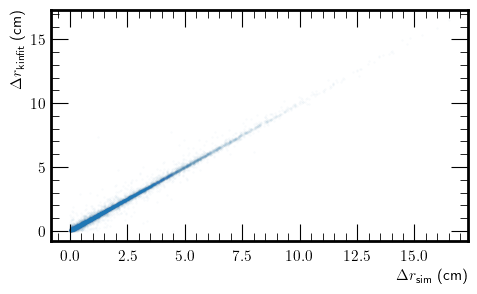

In [17]:
fl.kf_data.Draw(">>elist", "kf_err==0 && kf_chi2<100", "entryList")
draw_scatter('kf_data', 'elist', 'sim_vtx_dr', 'kf_vtx_dr', xlabel=r'$\Delta r_{\text{sim}}$ (cm)', ylabel=r'$\Delta r_{\text{kinfit}}$ (cm)')
plt.savefig('kf_sim_vs_kf_dr_chi2_100.eps')

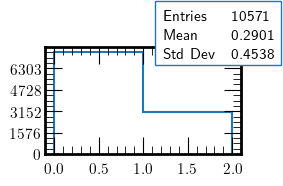

In [18]:
fl.kf_data.Draw("kf_hypo>>kf_hypo_sim0", 
                "kf_err==0 && sim_hypo==0", "goff")
draw_1d_hist("kf_hypo_sim0", xlabel=r'',
            fraction=0.47)
plt.savefig('kf_hypo_kskplpimi_xkpi.eps', bbox_inches='tight')

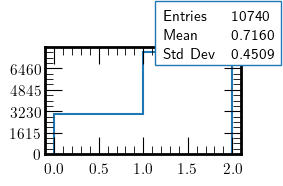

In [19]:
fl.kf_data.Draw("kf_hypo>>kf_hypo_sim1", 
                "kf_err==0 && sim_hypo==1", "goff")
draw_1d_hist("kf_hypo_sim1", xlabel=r'',
            fraction=0.47)
plt.savefig('kf_hypo_kskmipipl_xkpi.eps', bbox_inches='tight')

In [20]:
2929 / (7434 + 2929)

0.2826401621152176

In [21]:
2963 / (7588 + 2963)

0.2808264619467349

In [22]:
(2929 + 2963) / (7434 + 2929 + 7588 + 2963)

0.2817251601797839

In [23]:
# fl.Close()